<a href="https://colab.research.google.com/github/HEMA1188/GuviAssignment5_6_7/blob/main/GuviAssignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from copy import deepcopy
import itertools as it
%matplotlib inline

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [15]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [16]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [17]:
df.columns

Index(['Chirps/Second', 'Ground Temperature'], dtype='object')

In [18]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [19]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [20]:
df.shape

(15, 2)

In [21]:
reg = linear_model.LinearRegression()
ground_temp = df[['Ground Temperature']]
chirps_sec = df['Chirps/Second']
reg.fit(ground_temp, chirps_sec)

LinearRegression()

Find the linear regression equation for this data.

In [22]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(reg.coef_[0], reg.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


Chart the original data and the equation on the chart.

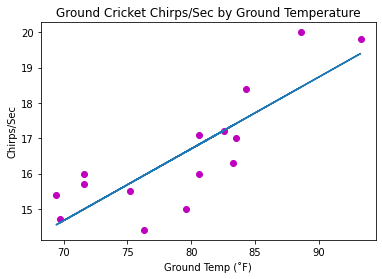

In [23]:
plt.scatter(ground_temp, chirps_sec, color='m')
plt.plot(ground_temp, reg.predict(ground_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [24]:
print('R^2 score for this equation: {:.4f}'
      .format(reg.score(ground_temp, chirps_sec)))

R^2 score for this equation: 0.6923



Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?



In [31]:
reg.predict(ground_temp)

array([18.44509085, 14.99409541, 19.39918959, 17.572192  , 16.821093  ,
       15.72489445, 14.60839592, 14.99409541, 14.547496  , 17.36919227,
       16.61809327, 17.22709246, 16.821093  , 17.40979222, 15.94819415])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [33]:
df1 = pd.read_fwf("brain_body.txt")
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [34]:
df1.shape

(62, 2)

In [35]:
df1.isnull().sum()

Brain    0
Body     0
dtype: int64

In [36]:
df1.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

In [37]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [38]:
df1.columns


Index(['Brain', 'Body'], dtype='object')

In [48]:
x=df1[['Brain']].values
y=df1[['Body']].values

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [51]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
x_pred=regressor.predict(x_train)

In [52]:

print(regressor.score(x_train,y_train))
print(regressor.score(x_test,y_test))

0.9177055948929866
-0.20923484927381697


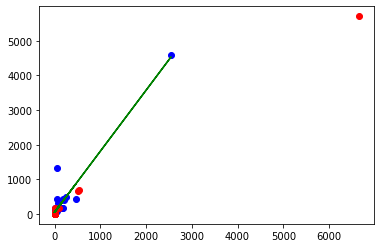

In [54]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,x_pred,color='green')
plt.scatter(x_test,y_test,color='red')
plt.show()


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [55]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [56]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [66]:
df3.shape

(52, 6)

In [58]:
df3[2:4]

,Sex,Rank,Year,Degree,YSdeg,Salary
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775


In [61]:
X=df3.drop(['Salary'],axis=1)
Y=df3['Salary']

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
x_pred=regressor.predict(x_train)

In [65]:
print(regressor.score(x_train,y_train))
print(regressor.score(x_test,y_test))

0.8175828316120763
0.8805655567154195


In [68]:
print(regressor.score(x_train,y_train))
print(regressor.coef_)

0.8175828316120763
[ 2422.4662497   5600.46935982   576.60614285 -1445.29376996
  -184.86754569]
